In [34]:
################################
# Solves - u'' = f             #
# With zero Dirichlet boundary #
################################
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt


# Problem Parameters
a = 0.
b = 1.


def exact(*x):
    return np.prod(np.sin(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2) * exact(*x)


def g(*x):
    return np.zeros_like(x[0])

In [35]:
# Parameters
d = 1
k = 2
delta = 0.5
N = 1000

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)

L = lambda func: lambda *x: - func.laplacian(*x)
B = lambda func: lambda *x: func(*x)

Lidx = lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0)
Bidx = lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0)

# Integration
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Solve for approximate solution
phi = rad.Wendland(d, k, delta, xc)
solver = rad.solve.CollocationSolver(phi, L, Lidx, B, Bidx)
approx = solver.solve(f, g)
error = rad.error(exact, approx, error_integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())
print("Bandwidth:", solver.bandwidth())

L2 Relative Error: 0.005590387107200313
Condition Number: 339033.08816627244
Bandwidth: (499, 499)


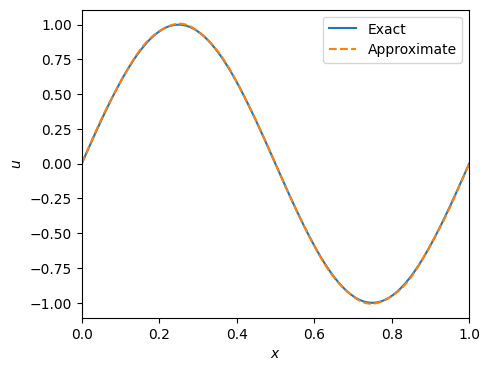

In [36]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.margins(x=0.)

x = rad.gridn(ranges, 200)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
ax.plot(*x, exact(*x), label="Exact")
ax.plot(*x, approx(*x), '--', label="Approximate")
ax.legend()

plt.show()